In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [90]:
data = pd.read_csv("../results/stock_data_clean.csv")
#data = data.dropna()
#df = df[np.isfinite(df['EPS'])]
data.head(6)

,Symbol,Name,MarketCap,Sector,Industry,Year,Date,Median_Quote,Median_Quote_prev,Median_Q_Growth,...,ROE_5Y,DEratio,DEratio_5Y,Profit_Margin,Profit_Margin_5Y,PEratio,Revenue_Growth,Cash_per_Share,MB_Ratio,MC_Ratio
0,ALGN,"Align Technology, Inc.",1.872550e+10,Health Care,Industrial Specialties,2014,2014-12-31,59.415001,54.120001,0.089119,...,0.145722,0.0000,0.00000,0.191,0.1448,32.825967,0.1537,2.4751,0.173337,3.790150
1,ALGN,"Align Technology, Inc.",1.872550e+10,Health Care,Industrial Specialties,2011,2011-12-31,28.700001,21.360000,0.255749,...,0.161133,0.0000,0.00000,0.139,0.1240,33.372094,0.2392,3.1377,0.291760,1.986168
2,AABA,Altaba Inc.,6.138974e+10,Technology,EDP Services,2013,2013-12-31,37.790001,26.710000,0.293199,...,0.121009,0.0849,0.02446,0.292,0.3162,29.069232,-0.0614,1.9736,0.483227,6.539826
3,AABA,Altaba Inc.,6.138974e+10,Technology,EDP Services,2012,2012-12-31,26.670000,15.600000,0.415073,...,0.107557,0.0086,0.00884,0.791,0.2694,8.057402,0.0005,2.2366,0.807436,5.631762
4,AABA,Altaba Inc.,6.138974e+10,Technology,EDP Services,2011,2011-12-31,15.600000,15.900000,-0.019231,...,0.066771,0.0108,0.02344,0.210,0.1296,19.024390,-0.2119,1.2261,0.638679,8.282359
5,AMGN,Amgen Inc.,1.285152e+11,Health Care,Biotechnology: Biological Products (No Diagnos...,2016,2016-12-31,169.046570,147.135604,0.129615,...,0.232715,1.1580,1.26290,0.336,0.2874,16.380482,0.0614,4.3329,0.275875,9.368091


In [91]:
data.describe().loc["mean",]

MarketCap               5.285544e+10
Year                    2.013674e+03
Median_Quote            7.001036e+01
Median_Quote_prev       6.130545e+01
Median_Q_Growth         1.000774e-01
Median_Q_Growth_prev    1.148241e-01
Lower_Quote             6.281333e+01
Lower_Quote_prev        5.472080e+01
Upper_Quote             7.766152e+01
Upper_Quote_prev        6.796814e+01
UpLow_Q_Var90           1.484819e+01
UpLow_Q_Var90_prev      1.324734e+01
ROE                     1.755675e-01
ROE_5Y                  1.561140e-01
DEratio                 7.490352e-01
DEratio_5Y              7.220633e-01
Profit_Margin           1.368644e-01
Profit_Margin_5Y        1.199702e-01
PEratio                 1.915021e+01
Revenue_Growth          6.557613e-02
Cash_per_Share          7.150026e+00
MB_Ratio                5.278188e-01
MC_Ratio                         inf
Name: mean, dtype: float64

In [92]:
data.describe(exclude=[np.number])

,Symbol,Name,Sector,Industry,Date
count,2220,2220,2220,2220,2220
unique,473,473,12,101,195
top,VNO,Honeywell International Inc.,Finance,Industrial Machinery/Components,2011-12-31
freq,6,6,357,102,286


In [93]:
data.columns

Index(['Symbol', 'Name', 'MarketCap', 'Sector', 'Industry', 'Year', 'Date',
       'Median_Quote', 'Median_Quote_prev', 'Median_Q_Growth',
       'Median_Q_Growth_prev', 'Lower_Quote', 'Lower_Quote_prev',
       'Upper_Quote', 'Upper_Quote_prev', 'UpLow_Q_Var90',
       'UpLow_Q_Var90_prev', 'ROE', 'ROE_5Y', 'DEratio', 'DEratio_5Y',
       'Profit_Margin', 'Profit_Margin_5Y', 'PEratio', 'Revenue_Growth',
       'Cash_per_Share', 'MB_Ratio', 'MC_Ratio'],
      dtype='object')

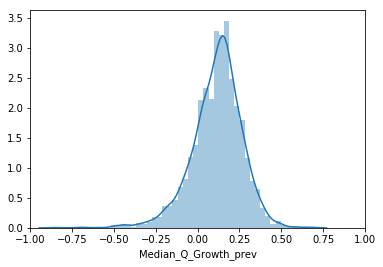

In [94]:
sns.distplot(data.Median_Q_Growth_prev)
plt.xlim([-1, 1])
plt.show()

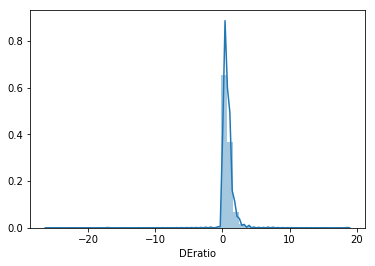

In [95]:
sns.distplot(data.DEratio)
plt.show()

In [151]:
data_2011 = data#.loc[data.Year == 2011,]
X = data_2011[['MarketCap', 'Median_Q_Growth_prev', 'DEratio', 'DEratio_5Y','Profit_Margin', 'Profit_Margin_5Y', 'PEratio', 'Revenue_Growth', 'MB_Ratio']]
y = data_2011["Median_Q_Growth"]

In [152]:
yX = data_2011[["Median_Q_Growth",'MarketCap', 'Median_Q_Growth_prev', 'DEratio', 'DEratio_5Y','Profit_Margin', 'Profit_Margin_5Y', 'PEratio', 'Revenue_Growth', 'MB_Ratio']]

/home/shun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


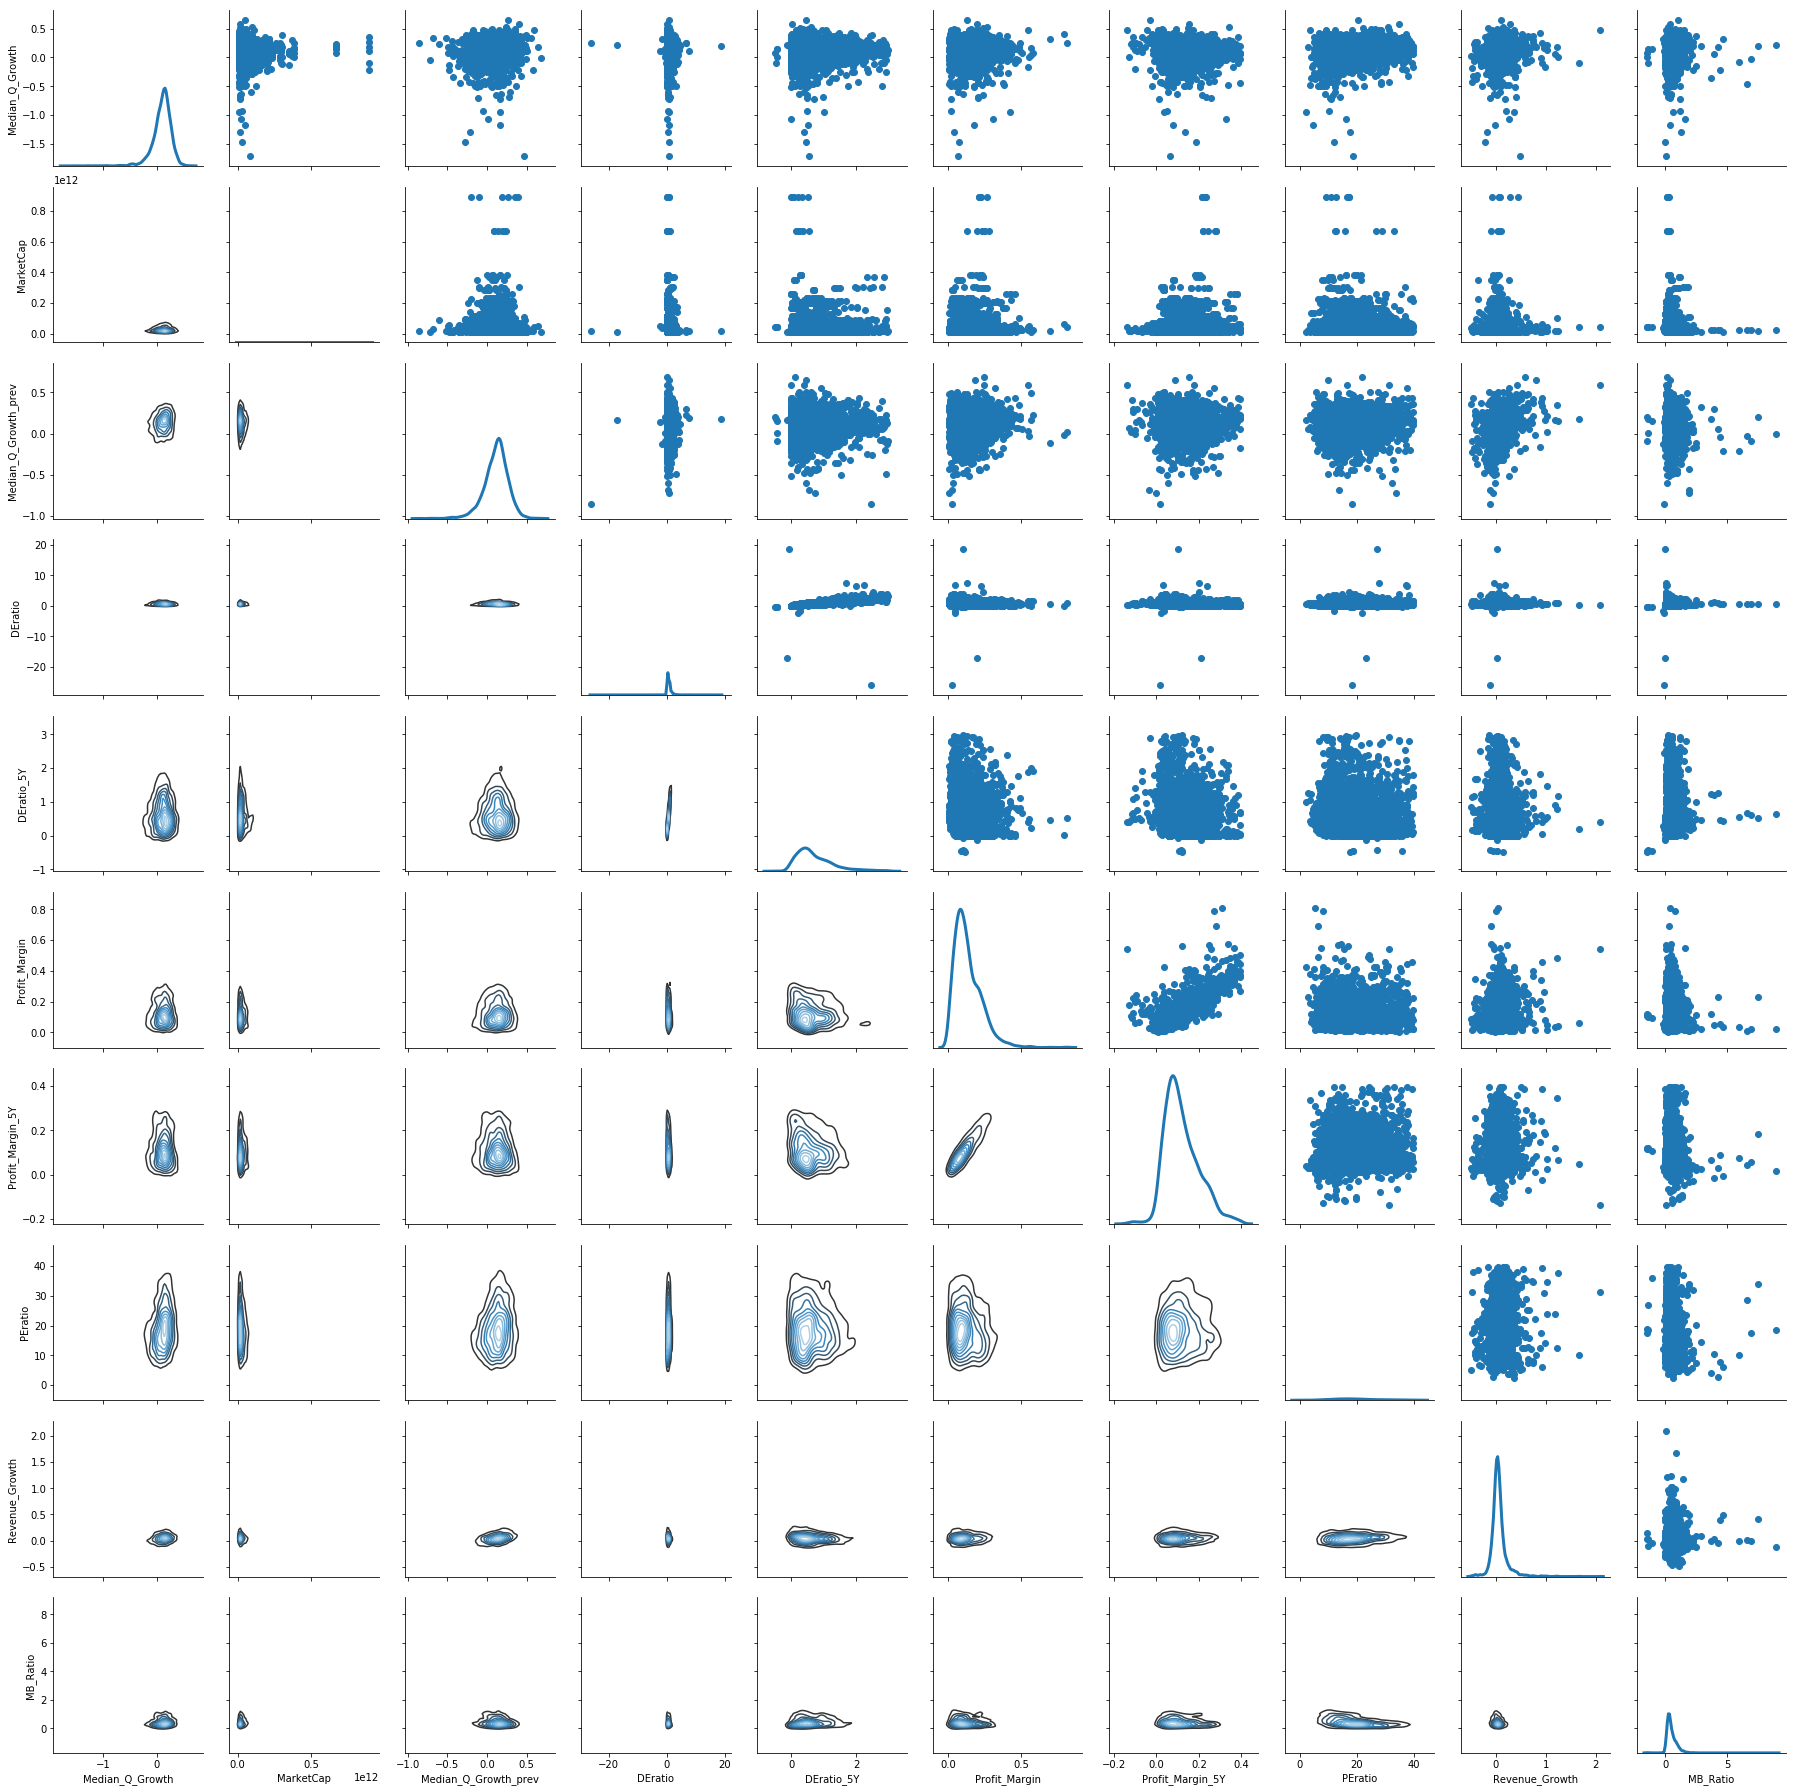

In [153]:
g = sns.PairGrid(yX)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score

In [154]:
paras = 10**np.arange(0,6)/100000
scores = []

for para in paras:
    regressor = Lasso(alpha = para)
    scores.append(np.mean(cross_val_score(regressor, X, y, cv=2)))

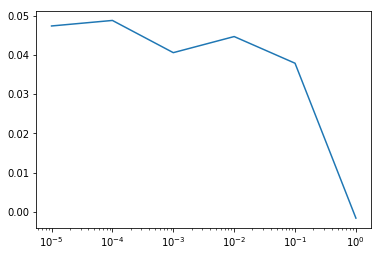

In [155]:
plt.semilogx(paras, scores)
plt.show()

In [156]:
maxdepths = np.arange(5, 21)
scores = []

for depth in maxdepths:
    regressor = DecisionTreeRegressor(max_depth = depth)
    scores.append(np.mean(cross_val_score(regressor, X, y, cv=2)))

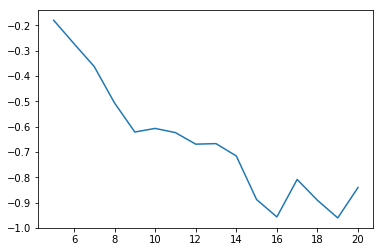

In [157]:
plt.plot(maxdepths, scores)
plt.show()

In [158]:
gammas = 10**np.arange(0,6)/100
scores = []

for gamma in gammas:
    regressor = SVR(gamma= gamma)
    scores.append(np.mean(cross_val_score(regressor, X, y, cv=10)))

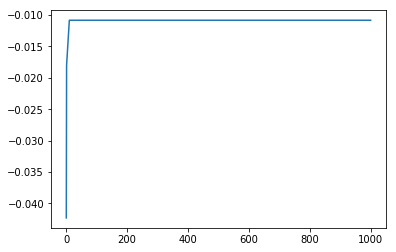

In [159]:
plt.plot(gammas, scores)
plt.show()

In [129]:
10**np.arange(1,)

array([ 10, 100])